In [15]:
!pip3 install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 6.9 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# Download the dataset from here: https://www.cse.cuhk.edu.hk/leojia/projects/detectabnormal/dataset.html

In [24]:
import cv2
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor
from PIL import Image

class CUHKAvenueDataset(Dataset):
    def __init__(self, root_dir, phase='training', transform=None):
        """
        Args:
            root_dir (string): Directory with all the videos.
            phase (string): 'training' or 'testing'.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.phase = phase
        self.transform = transform
        self.video_paths = self._get_video_paths()

    def _get_video_paths(self):
        if self.phase == 'training':
            return [os.path.join(self.root_dir, 'training_videos', f) for f in os.listdir(os.path.join(self.root_dir, 'training_videos'))]
        else:
            return [os.path.join(self.root_dir, 'testing_videos', f) for f in os.listdir(os.path.join(self.root_dir, 'testing_videos'))]

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        cap = cv2.VideoCapture(video_path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            frame = Image.fromarray(frame)  # Convert NumPy array to PIL Image
            if self.transform:
                frame = self.transform(frame)  # Apply transformations
            frames.append(frame)
        cap.release()
        
        # Stack frames into a single tensor
        frames = torch.stack(frames)
        return frames

# Example usage
transform = Compose([
    Resize((224, 224)),
    ToTensor()
])

dataset = CUHKAvenueDataset(root_dir='/Users/nikilravi/Downloads/Avenue Dataset/', phase='training', transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)  # Batch size is typically set to 1 for video datasets due to varying lengths of videos

print(len(dataloader))

for i, frames in enumerate(dataloader):
    # Process the frames
    print(frames.shape)  # Shape will be (batch_size, num_frames, C, H, W)


16
torch.Size([1, 510, 3, 224, 224])
torch.Size([1, 815, 3, 224, 224])
torch.Size([1, 353, 3, 224, 224])
torch.Size([1, 1223, 3, 224, 224])
torch.Size([1, 1364, 3, 224, 224])
torch.Size([1, 1511, 3, 224, 224])
torch.Size([1, 1391, 3, 224, 224])
torch.Size([1, 1017, 3, 224, 224])
torch.Size([1, 1511, 3, 224, 224])
torch.Size([1, 1099, 3, 224, 224])
torch.Size([1, 145, 3, 224, 224])
torch.Size([1, 1511, 3, 224, 224])
torch.Size([1, 781, 3, 224, 224])
torch.Size([1, 244, 3, 224, 224])
torch.Size([1, 366, 3, 224, 224])
torch.Size([1, 1487, 3, 224, 224])


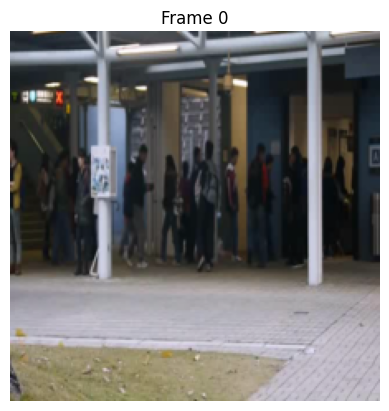

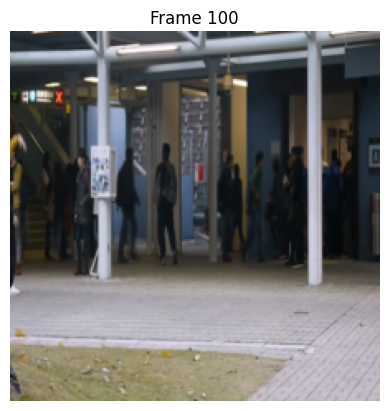

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'frames' is your tensor with shape [1, 1223, 3, 224, 224]
# Convert the tensor to numpy and squeeze the batch dimension since it's size 1
frames_np = frames.squeeze(0).numpy()  # Shape now is [1223, 3, 224, 224]

def show_frame(idx):
    """Function to display a single frame"""
    frame = frames_np[idx]
    plt.imshow(np.transpose(frame, (1, 2, 0)))
    plt.title(f"Frame {idx}")
    plt.axis('off')
    plt.show()

show_frame(0)  # Show the first frame
show_frame(100)  # Show the 101st frame

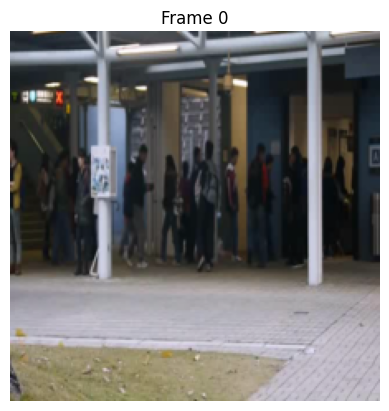

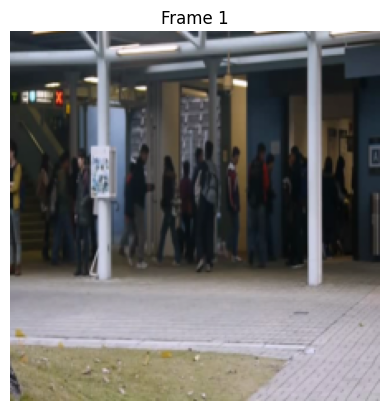

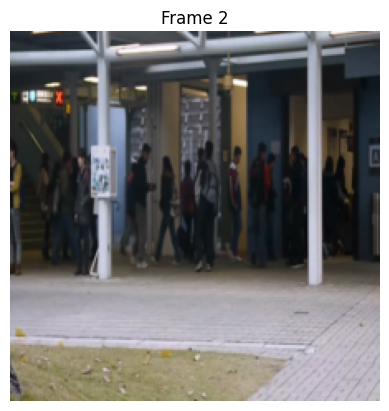

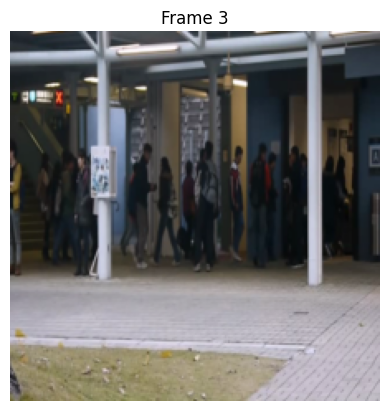

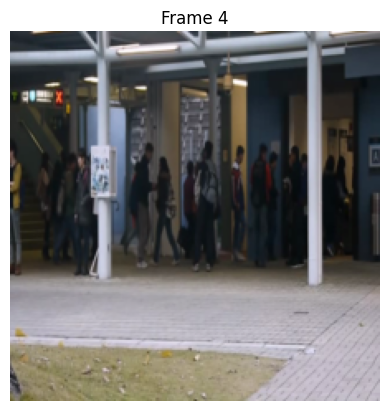

In [23]:
for i in range(5):
    show_frame(i)